[*********************100%%**********************]  1 of 1 completed

Epoch 1/20


60/60 [==============================] - 1s 7ms/step - loss: 0.0017 - val_loss: 3.7938e-04
Epoch 2/20
60/60 [==============================] - 0s 4ms/step - loss: 3.7217e-04 - val_loss: 4.6131e-04
Epoch 3/20
60/60 [==============================] - 0s 3ms/step - loss: 3.4367e-04 - val_loss: 3.0702e-04
Epoch 4/20
60/60 [==============================] - 0s 3ms/step - loss: 2.8018e-04 - val_loss: 2.3792e-04
Epoch 5/20
60/60 [==============================] - 0s 3ms/step - loss: 2.2435e-04 - val_loss: 2.4400e-04
Epoch 6/20
60/60 [==============================] - 0s 4ms/step - loss: 2.7715e-04 - val_loss: 2.0558e-04
Epoch 7/20
60/60 [==============================] - 0s 3ms/step - loss: 2.8442e-04 - val_loss: 1.6731e-04
Epoch 8/20
60/60 [==============================] - 0s 3ms/step - loss: 2.5220e-04 - val_loss: 1.5591e-04
Epoch 9/20
60/60 [==============================] - 0s 4ms/step - loss: 1.6829e-04 - val_loss: 1.4438e-04
Epoch 10/20
60/60 [==============================] - 0s 4ms/s

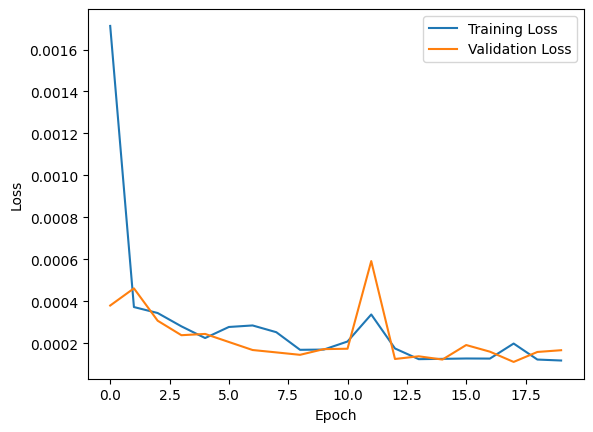

19/19 [==============================] - 0s 2ms/step


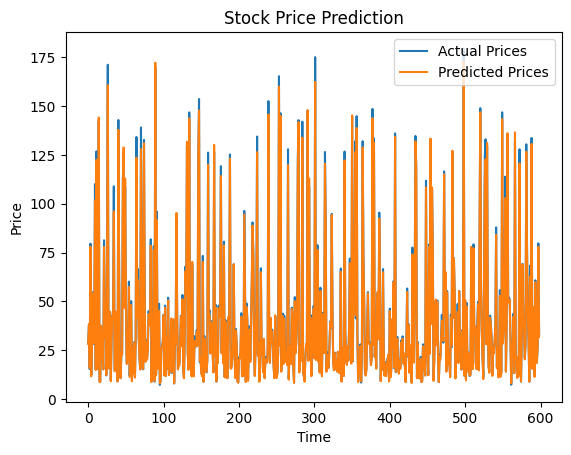

In [4]:
!pip install yfinance pandas numpy tensorflow matplotlib
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Fetch historical stock price data using yfinance
# Example: using historical stock price data of Apple Inc. (AAPL)
data = yf.download('AAPL', start='2010-01-01', end='2022-01-01')

# Preprocess data
# Considering only the 'Close' price for prediction
prices = data['Close'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
prices_normalized = scaler.fit_transform(prices)

# Convert to sequences for input to CNN
sequence_length = 30  # Number of previous days' prices to consider
X = []
y = []
for i in range(len(prices_normalized) - sequence_length):
    X.append(prices_normalized[i:i+sequence_length])
    y.append(prices_normalized[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = models.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Plot actual vs. predicted prices
plt.plot(scaler.inverse_transform(y_test), label='Actual Prices')
plt.plot(scaler.inverse_transform(predictions), label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()
